# Convert ages in Barker et al., 2011 to depth

(126,)
        depth      age
0        0.00   -0.050
1        0.55   -0.044
2        1.10   -0.037
3        1.65   -0.032
4        2.20   -0.025
...       ...      ...
5795  3187.25  797.408
5796  3187.80  798.443
5797  3188.35  799.501
5798  3188.90  800.589
5799  3189.45  801.662

[5800 rows x 2 columns]


Text(0.5, 1.0, 'Barker Depth vs Age')

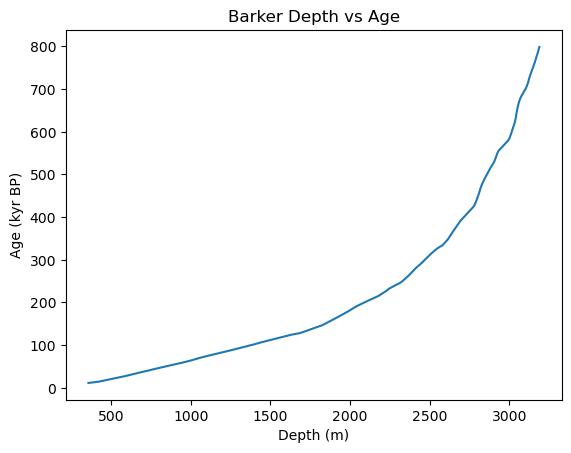

In [10]:
import numpy as np

Barker_ages_EDC3 = np.array([
    11.5, 14.3, 27.38, 29.26, 32.02, 33.34, 35.02, 37.78, 38.68,
    41.3, 43.1, 46.42, 53.3, 57.08, 58.58, 63.84, 70.68, 74.5,
    83.18, 89.92, 101.52, 106.54, 124.22, 128.44, 146.7, 148.3,
    150.06, 159.12, 162.16, 168.16, 172, 174.98, 177.14, 178.3,
    187.84, 192.16, 201.42, 215.22, 226.2, 229.76, 232.12, 242.18,
    243.62, 248.02, 251.3, 256.72, 258.48, 261.16, 263.68, 276.04,
    277.9, 280.52, 290.28, 296.26, 300.48, 305.44, 316.12, 325.98,
    332.76, 333.1, 333.62, 334.16, 347.62, 349.22, 363.24, 367.84,
    372.94, 382, 386.8, 390.96, 424.9, 426.96, 435.92, 438.82,
    443.88, 447.54, 451.94, 454.12, 462.46, 467.14, 469.28, 472.24,
    477.28, 488.7, 504.62, 507.9, 515.92, 522.08, 528.66, 537.84,
    547.84, 550.64, 555.64, 579.92, 584.92, 586.24, 590.38, 595.26,
    601.92, 618.6, 621.02, 625.78, 634, 637.98, 643.28, 644.52,
    650, 652.1, 656.84, 660.42, 663.88, 670.34, 676.4, 679.06,
    682.88, 693.5, 701.8, 714.94, 724.8, 725.94, 736.18, 757.46,
    764.24, 770.24, 787.44, 799
])

print(Barker_ages_EDC3.shape)

import pandas as pd

edc_depth_age_df = pd.read_csv(r'D:\VScode\bipolar_seesaw_CCM\barker_data\EDC_age_model_EDC3.tab', sep='\t',skiprows=20)
# only keep the first and third columns, rename them to 'depth' and 'age'
edc_depth_age_df = edc_depth_age_df.iloc[:, [0, 2]]
edc_depth_age_df.columns = ['depth', 'age']

print(edc_depth_age_df)


Barker_depth_EDC = np.interp(Barker_ages_EDC3,edc_depth_age_df['age'],edc_depth_age_df['depth'])

Barker_depth_EDC.shape

# plot Barker_depth_EDC and Barker_ages_EDC3
import matplotlib.pyplot as plt
plt.plot(Barker_depth_EDC, Barker_ages_EDC3)
plt.xlabel('Depth (m)')
plt.ylabel('Age (kyr BP)')
plt.title('Barker Depth vs Age')

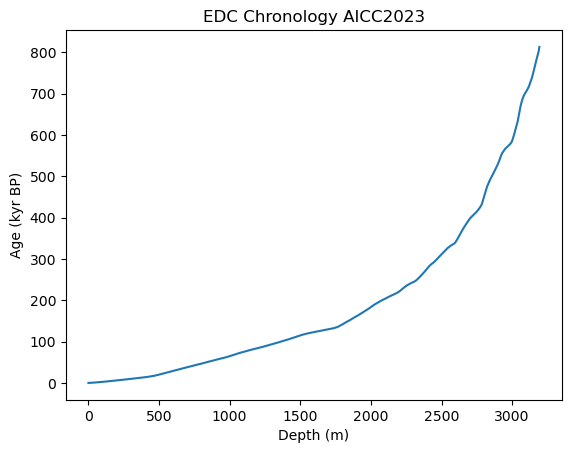

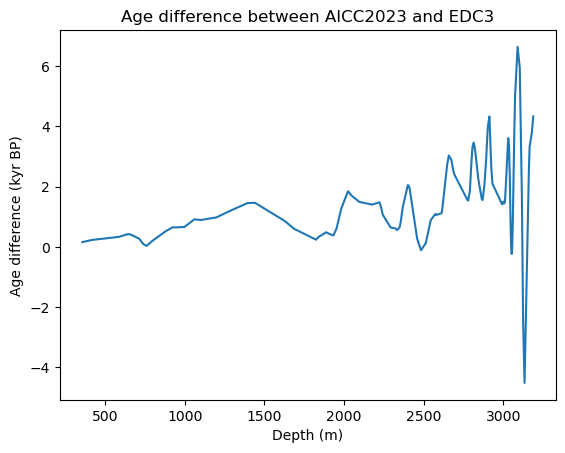

In [ ]:
# read the EDC_chronology_AICC2023.tab from the barker_data folder
edc_chronology_df = pd.read_csv(r'D:\VScode\bipolar_seesaw_CCM\barker_data\EDC_chronology_AICC2023.tab', sep='\t',skiprows=40)

# only keep columns 'Depth ice/snow [m]', and 'Ice age [ka BP] (AICC2023)' and rename them to 'depth' and 'age'
edc_chronology_df = edc_chronology_df.iloc[:, [0, 2]]
edc_chronology_df.columns = ['depth', 'age']

# plot depth vs age
plt.plot(edc_chronology_df['depth'], edc_chronology_df['age'])
plt.xlabel('Depth (m)')
plt.ylabel('Age (kyr BP)')
plt.title('EDC Chronology AICC2023')
plt.show()

# interpolate Barker_depth_EDC to the depth of EDC_chronology_df to get the age of Barker_depth_EDC
Barker_ages_AICC2023 = np.interp(Barker_depth_EDC, edc_chronology_df['depth'], edc_chronology_df['age'])

# save this to a csv file under the name Barker_ages_AICC2023.csv in the barker_data folder
Barker_ages_AICC2023_df = pd.DataFrame({'age': Barker_ages_AICC2023})
Barker_ages_AICC2023_df.to_csv(r'D:\VScode\bipolar_seesaw_CCM\barker_data\Barker_ages_AICC2023.csv', index=False)
# read the csv file to check if it is saved correctly
Barker_ages_AICC2023_df = pd.read_csv(r'D:\VScode\bipolar_seesaw_CCM\barker_data\Barker_ages_AICC2023.csv')

# compare the two ages, use depth as x axis and the difference between the two ages as y axis
plt.plot(Barker_depth_EDC, Barker_ages_AICC2023 - Barker_ages_EDC3)
plt.xlabel('Depth (m)')
plt.ylabel('Age difference (kyr BP)')
plt.title('Age difference between AICC2023 and EDC3')
plt.show()


In [13]:
edc_chronology_df.columns

Index(['Depth ice/snow [m]', 'Ice age [ka BP] (AICC2012)',
       'Ice age [ka BP] (AICC2023)', 'Ice age unc [ka] (AICC2023)',
       'Gas age [ka BP] (AICC2012)', 'Gas age [ka BP] (AICC2023)',
       'Gas age unc [ka] (AICC2023)',
       'Age diff unc [±] (Ice-Gas Age difference uncert...)',
       'Acc rate ice analyzed [m/a]', 'Acc rate ice analyzed unc [±]',
       'Thinning analyzed', 'Thinning analyzed unc', 'LID analyzed [m]',
       'LID analyzed unc [m]',
       'Depth diff [m] (Between ice and gas of same age)',
       'Depth diff unc [±] (Between ice and gas of same age)'],
      dtype='object')